Use MNIST dataset to build LeNet model with dropout
Draw graphs for model accuracy and model loss
Show how to reshape the dataset and one hot encode it 

In [ ]:
from keras import backend as K
from keras.models import Sequential 
from keras.layers import Dense , Dropout ,Flatten, Conv2D, MaxPooling2D, Activation
from keras.datasets import mnist 
from keras.utils import np_utils
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
import numpy as np
import matplotlib.pyplot as plt

Defining LeNet

First layer is convolutional with activational function ReLU, then max pooling is added


In [ ]:
class LeNet:
	@staticmethod
	def build(input_shape, classes):
		model = Sequential()
		# CONV => RELU => POOL
		model.add(Conv2D(20, kernel_size=5, padding="same",
			input_shape=input_shape))
		model.add(Activation("relu"))
		model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
		# CONV => RELU => POOL
		model.add(Conv2D(50, kernel_size=5, padding="same"))
		model.add(Activation("relu"))
		model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
		# Flatten => RELU layers
		model.add(Flatten())
		model.add(Dense(500))
		model.add(Dropout(0.3))
		model.add(Activation("relu"))
 
		# a softmax classifier
		model.add(Dense(classes))
		model.add(Activation("softmax"))

		return model

In [ ]:
#Defining training
NB_EPOCH = 20
BATCH_SIZE = 128
VERBOSE = 1
OPTIMIZER = Adam()
VALIDATION_SPLIT=0.2

IMG_ROWS, IMG_COLS = 28, 28 # input image dimensions
NB_CLASSES = 10  # number of outputs = number of digits
INPUT_SHAPE = (IMG_ROWS, IMG_COLS, 1)

In [ ]:
#train test split
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255 
X_test /= 255  
# reshaping the dataset
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)


In [ ]:
#convert classes 
y_train = np_utils.to_categorical(y_train, NB_CLASSES)
y_test = np_utils.to_categorical(y_test, NB_CLASSES)

In [ ]:
#intiate optimiser and model
model = LeNet.build(input_shape=INPUT_SHAPE, classes=NB_CLASSES)
model.compile(loss="categorical_crossentropy", optimizer=OPTIMIZER,
	metrics=["accuracy"])

history = model.fit(X_train, y_train, 
		batch_size=BATCH_SIZE, epochs=NB_EPOCH, 
		verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

score = model.evaluate(X_test, y_test, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/20
375/375 [==============================] - 94s 250ms/step - loss: 0.1947 - accuracy: 0.9414 - val_loss: 0.0515 - val_accuracy: 0.9834
Epoch 2/20
375/375 [==============================] - 89s 237ms/step - loss: 0.0516 - accuracy: 0.9842 - val_loss: 0.0411 - val_accuracy: 0.9882
Epoch 3/20
375/375 [==============================] - 88s 234ms/step - loss: 0.0354 - accuracy: 0.9894 - val_loss: 0.0354 - val_accuracy: 0.9895
Epoch 4/20
375/375 [==============================] - 88s 233ms/step - loss: 0.0278 - accuracy: 0.9911 - val_loss: 0.0318 - val_accuracy: 0.9910
Epoch 5/20
375/375 [==============================] - 87s 233ms/step - loss: 0.0232 - accuracy: 0.9924 - val_loss: 0.0407 - val_accuracy: 0.9892
Epoch 6/20
375/375 [==============================] - 87s 232ms/step - loss: 0.0169 - accuracy: 0.9946 - val_loss: 0.0359 - val_accuracy: 0.9906
Epoch 7/20
375/375 [==============================] - 87s 233ms/step - loss: 0.0129 - accuracy: 0.9957 - val_loss: 0.0301 - val_ac

In [ ]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


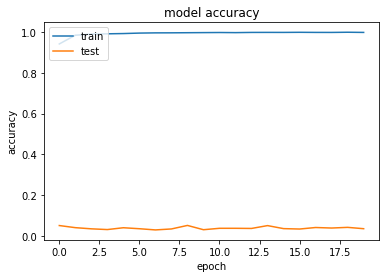

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

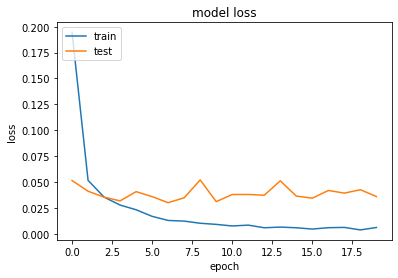

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()